#Importing the Dataset

In [7]:
import numpy as np
import pandas as pd

In [8]:
dataset = pd.read_csv("Dataset.csv",encoding='latin1')

In [9]:
dataset.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4308,ham,He dint tell anything. He is angry on me that ...,NaN,NaN,NaN
4222,ham,Stupid auto correct on my phone,NaN,NaN,NaN
225,ham,Would really appreciate if you call me. Just n...,NaN,NaN,NaN
3113,ham,Yes watching footie but worried we're going to...,NaN,NaN,NaN
4475,ham,I'll pick you up at about 5.15pm to go to taun...,NaN,NaN,NaN


In [10]:
dataset.shape

(5572, 5)

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


#Data Cleaning


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In last 3 columns there are lot of missing vvalues so we'll just drop the last three columns


In [13]:
dataset.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [15]:
dataset.rename(columns={'v1':'target','v2':'text'},inplace = True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


##Binary Classes Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [17]:
dataset['target']

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: target, Length: 5572, dtype: object

In [18]:
dataset['target'] = encoder.fit_transform(dataset['target'])

In [19]:
dataset['target']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5572, dtype: int64

 0 = ham
  
 1 = spam

In [20]:
dataset.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
dataset.isnull().sum()

target    0
text      0
dtype: int64

##Managing Duplicate Values

In [22]:
dataset.duplicated().sum()

403

In [23]:
dataset = dataset.drop_duplicates(keep = 'first')

In [24]:
dataset.duplicated().sum()

0

In [25]:
dataset.shape

(5169, 2)

#Exploratory Data Analysis

In [26]:
dataset.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [27]:
dataset['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7ccbc8a30910>,
 [Text(-1.0144997251399075, 0.42519443516002464, 'han'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001339, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

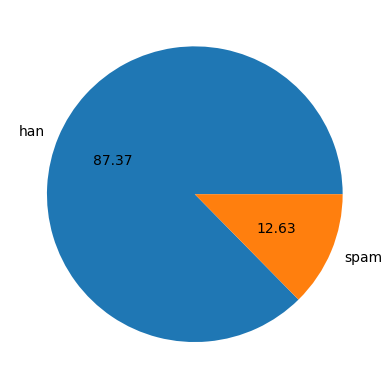

In [28]:
import matplotlib.pyplot as plt
plt.pie(dataset['target'].value_counts(),labels=['han','spam'],autopct = '%0.2f')

Spam and Han are not equal and their is a huge difference which shows there is **Data Imbalance**

In [29]:
import nltk

In [30]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [31]:
dataset['num_chars'] = dataset['text'].apply(len)

In [32]:
dataset.head()

,target,text,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [33]:
dataset['num_words'] =dataset['text'].apply(lambda x:len(nltk.word_tokenize(x)))
dataset.head()

,target,text,num_chars,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [34]:
dataset['num_sent'] =dataset['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
dataset.head()

,target,text,num_chars,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [35]:
dataset[['num_chars','num_words','num_sent']].describe()

,num_chars,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [36]:
dataset[dataset['target']==0][['num_chars','num_words','num_sent']].describe()

,num_chars,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [37]:
dataset[dataset['target']==1][['num_chars','num_words','num_sent']].describe()

,num_chars,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [38]:
import seaborn as sns

<Axes: xlabel='num_chars', ylabel='Count'>

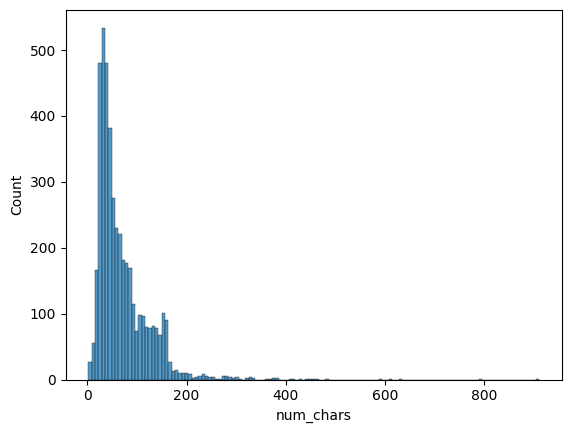

In [39]:
sns.histplot(dataset[dataset['target']==0]['num_chars'])

<Axes: xlabel='num_chars', ylabel='Count'>

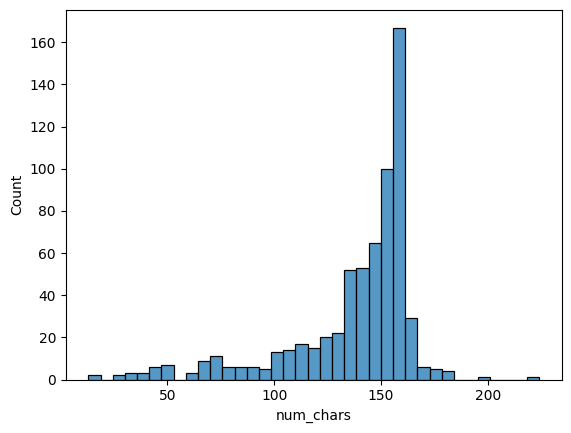

In [40]:
sns.histplot(dataset[dataset['target']==1]['num_chars'])

<Axes: xlabel='num_chars', ylabel='Count'>

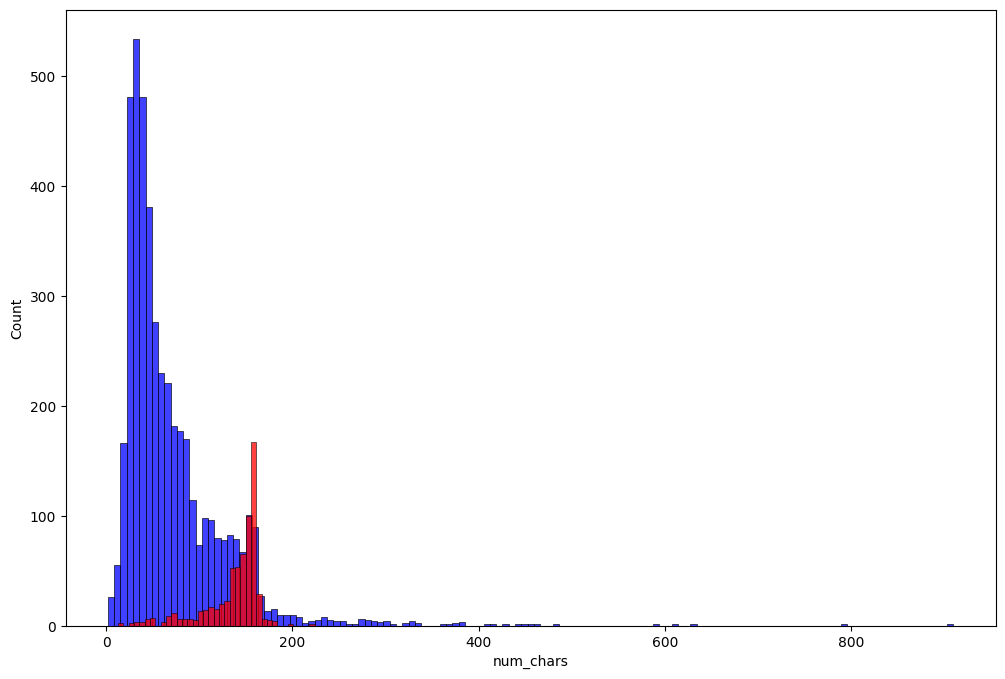

In [41]:
plt.figure(figsize=(12,8))
sns.histplot(dataset[dataset['target']==0]['num_chars'],color = 'blue')
sns.histplot(dataset[dataset['target']==1]['num_chars'],color  = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

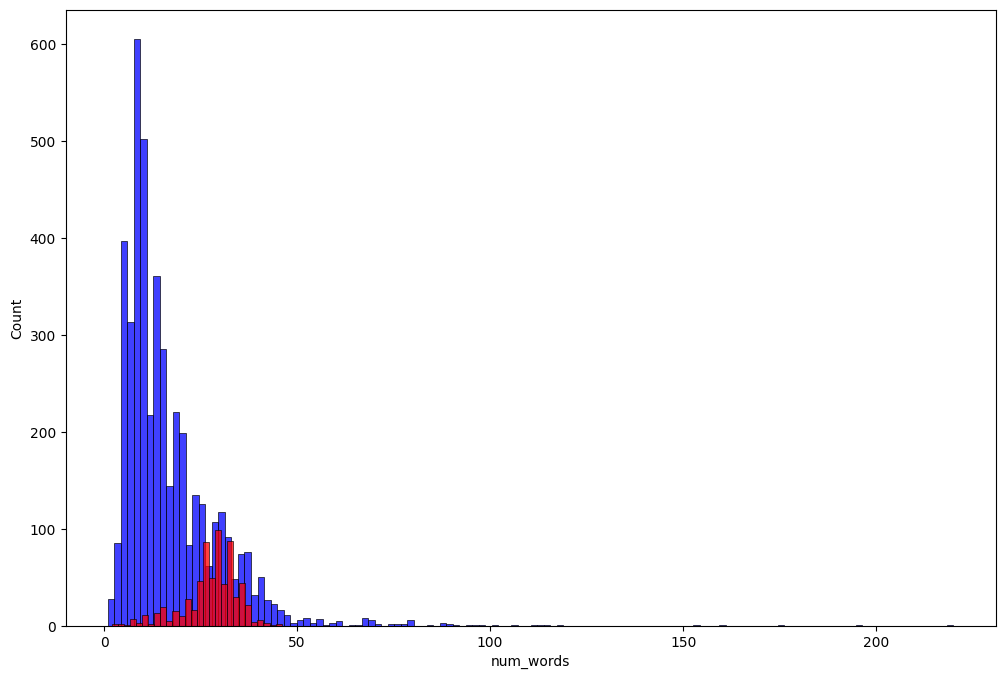

In [42]:
plt.figure(figsize=(12,8))
sns.histplot(dataset[dataset['target']==0]['num_words'],color = 'blue')
sns.histplot(dataset[dataset['target']==1]['num_words'],color  = 'red')

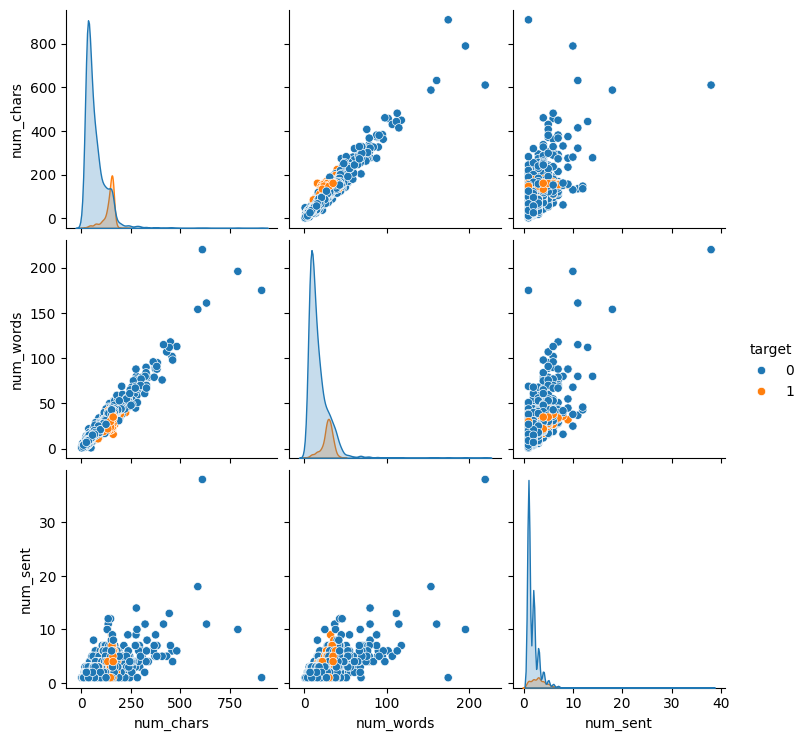

In [43]:
sns.pairplot(dataset,hue = 'target')

#Text Preprocessing

In [44]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [45]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [46]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [47]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('eating')

'eat'

In [48]:
def text_transformer(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum() and i not in stopwords.words('english') and i not in string.punctuation:
      y.append(ps.stem(i))


  return ' '.join(y)

In [49]:
text_transformer("Hello This is Spam Detection ^%  Model")

'hello spam detect model'

In [50]:
dataset['transformed_text'] = dataset['text'].apply(text_transformer)
dataset['transformed_text']

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: transformed_text, Length: 5169, dtype: object

In [51]:
dataset.head()

,target,text,num_chars,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


##Mostly Ocuuring Words


In [52]:
from wordcloud import WordCloud
wc = WordCloud(width = 500,height=500,min_font_size=10,background_color='white')


###Spam

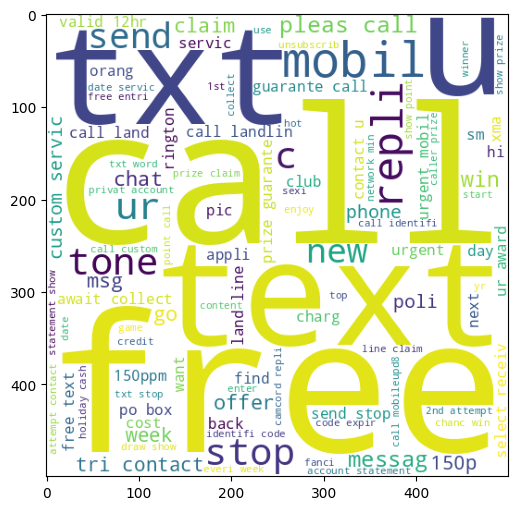

In [53]:
spam_wc = wc.generate(dataset[dataset['target']==1]['transformed_text'].str.cat(sep=" "))

plt.figure(figsize = (15,6))
plt.imshow(spam_wc)

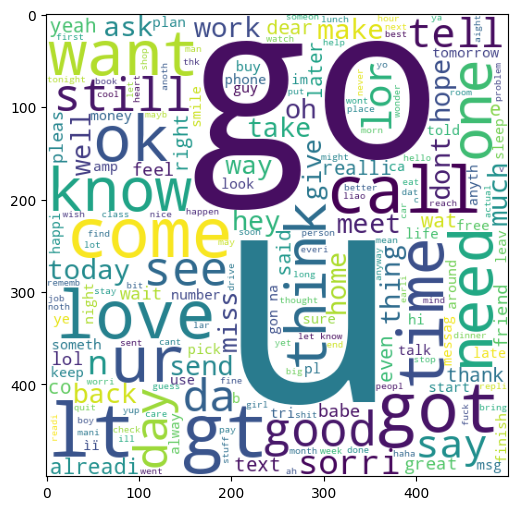

In [54]:
ham_wc = wc.generate(dataset[dataset['target']==0]['transformed_text'].str.cat(sep=" "))

plt.figure(figsize = (15,6))
plt.imshow(ham_wc)

In [55]:
spam_corpus = []
for msg in dataset[dataset['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)



In [56]:
len(spam_corpus)

9939

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'u'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'tone'),
  Text(17, 0, 'send'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'nokia'),
  Text(20, 0, 'contact'),
  Text(21, 0, 'award'),
  Text(22, 0, 'phone'),
  Text(23, 0, 'cash'),
  Text(24, 0, 'pleas'),
  Text(25, 0, 'week'),
  Text(26, 0, 'win'),
  Text(27, 0, 'c'),
  Text(28, 0, 'collect'),
  Text(29, 0, 'min')])

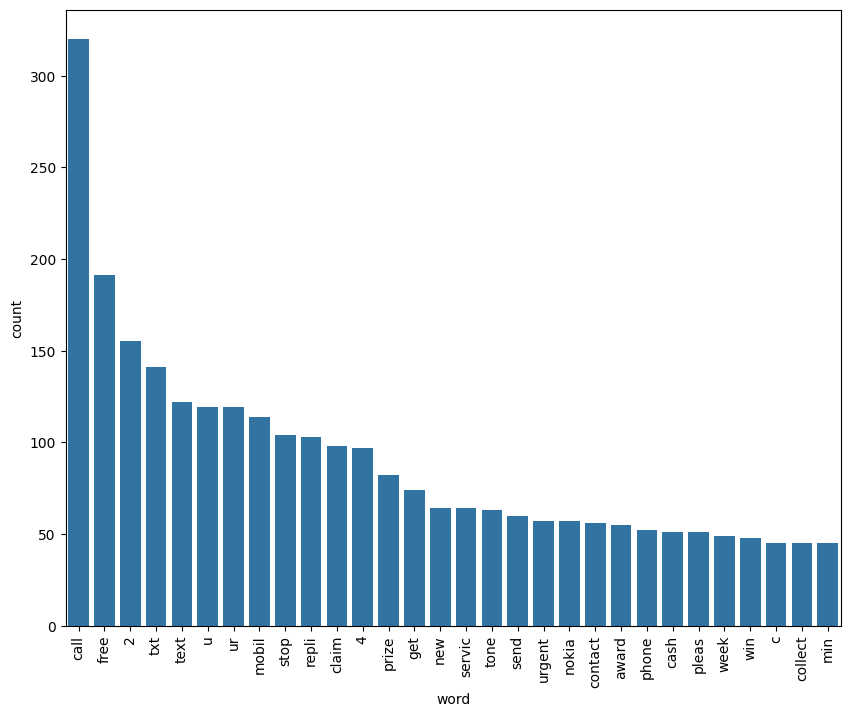

In [57]:
from collections import Counter
spam_counts = Counter(spam_corpus).most_common(30)
df_spam_counts = pd.DataFrame(spam_counts, columns=['word', 'count'])

plt.figure(figsize=(10, 8))
sns.barplot(data=df_spam_counts, x='word', y='count')
plt.xticks(rotation='vertical')

###Ham

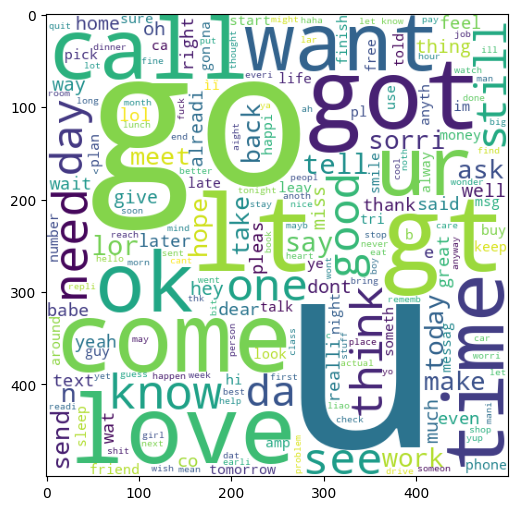

In [58]:
ham_wc = wc.generate(dataset[dataset['target']==0]['transformed_text'].str.cat(sep=" "))

plt.figure(figsize = (15,6))
plt.imshow(ham_wc)

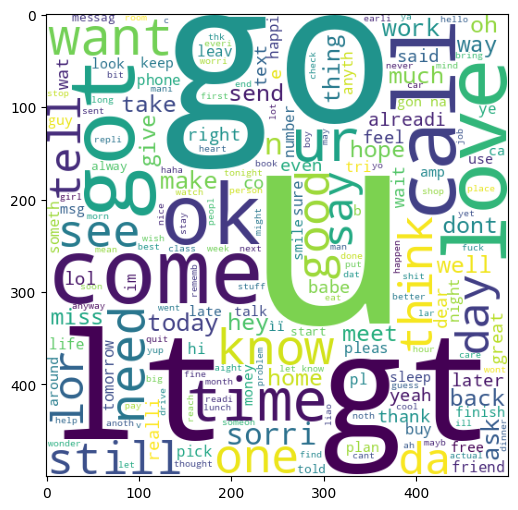

In [59]:
ham_wc = wc.generate(dataset[dataset['target']==0]['transformed_text'].str.cat(sep=" "))

plt.figure(figsize = (15,6))
plt.imshow(ham_wc)

In [60]:
ham_corpus = []
for msg in dataset[dataset['target']==0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)



In [61]:
len(ham_corpus)

35404

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'u'),
  Text(1, 0, 'go'),
  Text(2, 0, 'get'),
  Text(3, 0, 'gt'),
  Text(4, 0, 'lt'),
  Text(5, 0, '2'),
  Text(6, 0, 'come'),
  Text(7, 0, 'got'),
  Text(8, 0, 'know'),
  Text(9, 0, 'like'),
  Text(10, 0, 'call'),
  Text(11, 0, 'time'),
  Text(12, 0, 'ok'),
  Text(13, 0, 'love'),
  Text(14, 0, 'good'),
  Text(15, 0, 'want'),
  Text(16, 0, 'ur'),
  Text(17, 0, 'day'),
  Text(18, 0, 'need'),
  Text(19, 0, 'one'),
  Text(20, 0, 'lor'),
  Text(21, 0, '4'),
  Text(22, 0, 'home'),
  Text(23, 0, 'think'),
  Text(24, 0, 'see'),
  Text(25, 0, 'take'),
  Text(26, 0, 'still'),
  Text(27, 0, 'da'),
  Text(28, 0, 'tell'),
  Text(29, 0, 'make')])

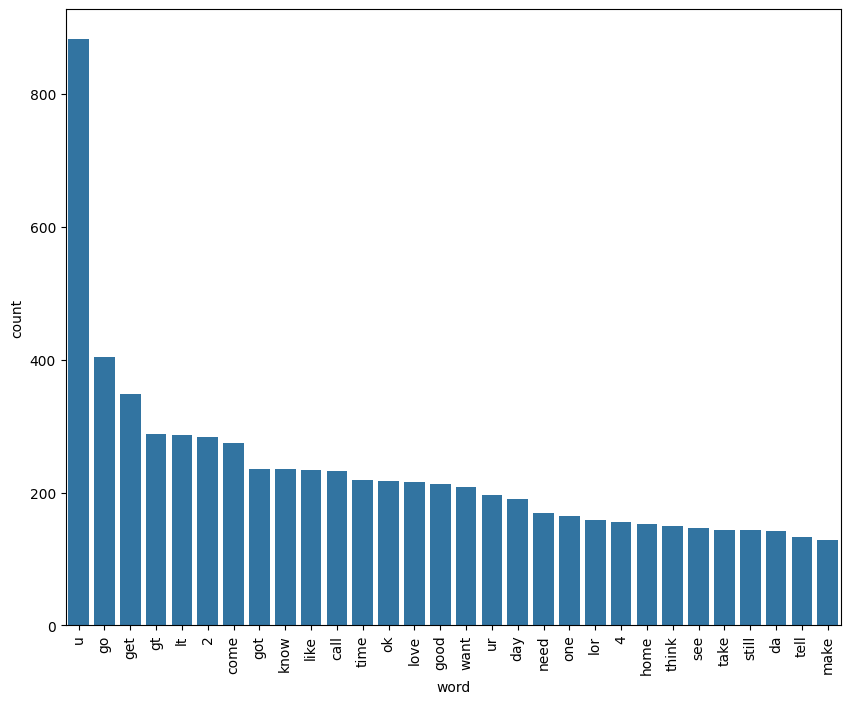

In [62]:
from collections import Counter
ham_counts = Counter(ham_corpus).most_common(30)
df_ham_counts = pd.DataFrame(ham_counts, columns=['word', 'count'])

plt.figure(figsize=(10, 8))
sns.barplot(data=df_ham_counts, x='word', y='count')
plt.xticks(rotation='vertical')

#Building the Model

##Transforming x and y

In [63]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
x = cv.fit_transform(dataset['transformed_text']).toarray()
x.shape

In [ ]:
y = dataset['target'].values
y

##Splitting the Dataset to Training and Test Set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

##Trying and testing different models

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(x_train,y_train)
y_p_g = gnb.predict(x_test )
print('Accuracy Score: ',accuracy_score(y_test,y_p_g))
print("Confusion Score",confusion_matrix(y_test,y_p_g))
print('Precision Score: ',precision_score(y_test,y_p_g))



In [ ]:
mnb.fit(x_train,y_train)
y_p_m = mnb.predict(x_test )
print('Accuracy Score: ',accuracy_score(y_test,y_p_m))
print("Confusion Score",confusion_matrix(y_test,y_p_m))
print('Precision Score: ',precision_score(y_test,y_p_m))



In [ ]:
bnb.fit(x_train,y_train)
y_p_b = bnb.predict(x_test )
print('Accuracy Score: ',accuracy_score(y_test,y_p_b))
print("Confusion Score",confusion_matrix(y_test,y_p_b))
print('Precision Score: ',precision_score(y_test,y_p_b))



##Multiple Model Test

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [82]:
lrc = LogisticRegression(solver='liblinear',penalty='l1')
svc = SVC(kernel='sigmoid',gamma=1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [83]:
models = {
  'LR' : lrc,
  'SVC' : svc,
  'NB' : mnb,
  'DT' : dtc,
  'KN' : knc,
  'RF' : rfc,
  'AB' : abc,
  'B' : bc,
  'ET' : etc,
  'GB' : gbc,
  'XGB' : xgb,
}

In [84]:
def analyse_classifier(model,x_train,y_train,x_test,y_test):
  model.fit(x_train,y_train)
  y_p = model.predict(x_test)
  accuracy = accuracy_score(y_test,y_p)
  precision = precision_score(y_test,y_p)
  return accuracy,precision

In [85]:
accuracy_scores = []
precision_scores = []
for name,model in models.items():
  a,p = analyse_classifier(model,x_train,y_train,x_test,y_test)
  print('Model: ',name)
  print('Accuracy: ',a)
  print('Precision: ',p)
  accuracy_scores.append(a)
  precision_scores.append(p)


Model:  LR
Accuracy:  0.9709864603481625
Precision:  0.9736842105263158
Model:  SVC
Accuracy:  0.9264990328820116
Precision:  0.7421875
Model:  NB
Accuracy:  0.9642166344294004
Precision:  0.8344370860927153
Model:  DT
Accuracy:  0.9245647969052224
Precision:  0.9166666666666666
Model:  KN
Accuracy:  0.9061895551257253
Precision:  1.0
Model:  RF
Accuracy:  0.971953578336557
Precision:  1.0
Model:  AB
Accuracy:  0.9632495164410058
Precision:  0.9464285714285714
Model:  B
Accuracy:  0.9622823984526112
Precision:  0.9159663865546218
Model:  ET
Accuracy:  0.97678916827853
Precision:  0.9913793103448276
Model:  GB
Accuracy:  0.9439071566731141
Precision:  0.9444444444444444
Model:  XGB
Accuracy:  0.9738878143133463
Precision:  0.9663865546218487


In [86]:
print(models)
print(accuracy_scores)
print(precision_scores)

{'LR': LogisticRegression(penalty='l1', solver='liblinear'), 'SVC': SVC(gamma=1.0, kernel='sigmoid'), 'NB': MultinomialNB(), 'DT': DecisionTreeClassifier(max_depth=5), 'KN': KNeighborsClassifier(), 'RF': RandomForestClassifier(n_estimators=50, random_state=2), 'AB': AdaBoostClassifier(random_state=2), 'B': BaggingClassifier(n_estimators=50, random_state=2), 'ET': ExtraTreesClassifier(n_estimators=50, random_state=2), 'GB': GradientBoostingClassifier(n_estimators=50, random_state=2), 'XGB': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_del

In [87]:
performance = pd.DataFrame({'Model':models.keys(),'Accuracy':accuracy_scores,'Precisioc':precision_scores})

In [88]:
performance


,Model,Accuracy,Precisioc
0,LR,0.970986,0.973684
1,SVC,0.926499,0.742188
2,NB,0.964217,0.834437
3,DT,0.924565,0.916667
4,KN,0.906190,1.000000
5,RF,0.971954,1.000000
6,AB,0.963250,0.946429
7,B,0.962282,0.915966
8,ET,0.976789,0.991379
9,GB,0.943907,0.944444
